In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH',
    'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG', 'JD', 'LRCX', 'LSPD',
    'LULU', 'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR', 'NVDA',
    'ODFL', 'OKTA', 'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON',
    'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU',
    'RVLV', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX',
    'TSCO', 'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL', 'UPST',
    'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AMEH', 'AMRK', 'APT', 'CENN',
    'CTGO', 'DTST', 'EP', 'FCUV', 'FKWL', 'GGE', 'GME', 'INTZ', 'KREF',
    'LFMD', 'MCVT', 'MIY', 'MNMD', 'MOBQ', 'PETV',
    'POWW', 'PRPH', 'RVYL', 'VIRT', 'WAVD', 'WKHS', 'ZYXI']
BEST_WEIGHTED = [
    'BTTR', 'BYRN', 'CEF', 'CGAU', 'CIZN', 'DYAI', 'HMY', 'HNRG',
    'IEI', 'MGF', 'MICS', 'MIN', 'MMU', 'MUE', 'NAN', 'NXN', 'NXP',
    'OMQS', 'RVP', 'SOBR']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

78

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-11-05', datetime.date(2022, 11, 5))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  127 of 127 completed
Generating derived columns...
AAPL... ABMD... ABNB... ACN... ADBE... ADYEY... AMD... AMEH... AMGN... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BTTR... BYND... BYRN... CEF... CENN... CGAU... CHWY... CIZN... CRWD... CTGO... DDOG... DOCS... DOCU... DTST... DUOL... DYAI... EDIT... EP... ETSY... FCUV... FKWL... FLGT... GGE... GH... GME... GMED... GOOG... HMY... HNRG... IDXX... IEI... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MCVT... MDB... MELI... MGF... MICS... MIN... MIY... MMU... MNMD... MNST... MOBQ... MSFT... MTCH... MUE... NAN... NVCR... NVDA... NXN... NXP... ODFL... OKTA... OMQS... OPEN... PAC... PANW... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RGEN... RIVN... RMD... ROKU... RVLV... RVP... RVYL... SE... SHOP... SNOW... SOBR... TASK... TDOC... TEAM... TREX... TSCO... TSLA... TTD... TTWO... TWLO... TWTR... TYL... UPST... VEEV... VIRT..

In [5]:
data['Date'].tail()

2514   2022-10-31
2515   2022-11-01
2516   2022-11-02
2517   2022-11-03
2518   2022-11-04
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.007853
2       0.976295
3       0.987795
4       1.001699
5       1.000130
          ...   
2514    0.992546
2515    0.995899
2516    0.974998
2517    0.989414
2518    1.013619
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.010737
2,1.000000
3,1.005233
4,1.004881
5,1.006090
...,...
2514,1.006122
2515,1.014299
2516,0.987935
2517,1.008279


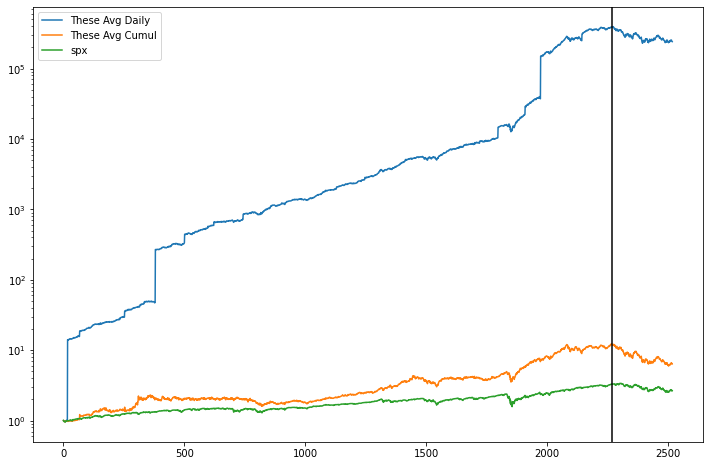

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-11-05,NaN,NaN
1,2012-11-06,0.998643,0.998643
2,2012-11-07,0.988231,0.988253
3,2012-11-08,0.990194,0.989783
4,2012-11-09,0.987762,0.987878


In [10]:
out.tail()

,Date,mine1,mine2
2514,2022-10-31,252460.421827,6.536485
2515,2022-11-01,253957.539711,6.635075
2516,2022-11-02,245407.076526,6.404825
2517,2022-11-03,242637.472853,6.375898
2518,2022-11-04,241529.512111,6.386206


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

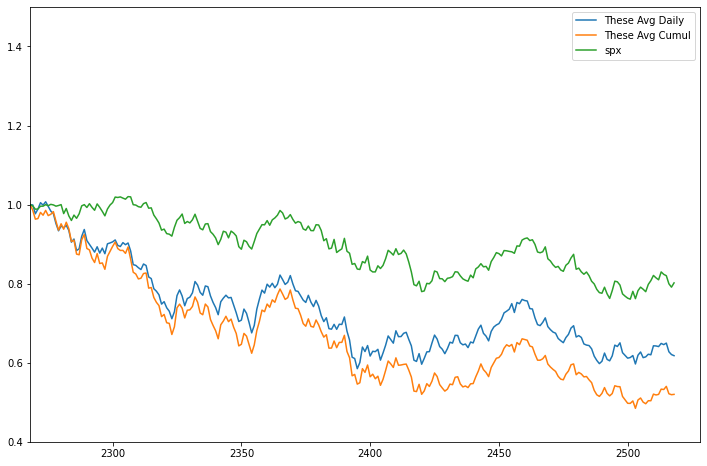

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2459,88.709999,88.709999,89.019997,86.260002,88.550003,4.485373,1.001807,1.001468,0.999661
2460,89.970001,89.970001,92.349998,86.691002,88.839996,4.499476,1.012720,1.014204,1.001465
2461,77.430000,77.430000,87.500000,75.720001,87.000000,4.349374,0.890000,0.860620,0.966989
2462,72.489998,72.489998,75.150002,69.500000,74.900002,4.283449,0.967824,0.936200,0.967325
2463,70.000000,70.000000,72.290001,67.769997,72.040001,4.248495,0.971682,0.965650,0.993792


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2459,88.709999,88.709999,89.019997,86.260002
2460,89.970001,89.970001,92.349998,86.691002
2461,77.430000,77.430000,87.500000,75.720001
2462,72.489998,72.489998,75.150002,69.500000
2463,70.000000,70.000000,72.290001,67.769997


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2459,88.709999,88.709999,89.019997,86.260002,92.349998,86.691002,1.041033,0.977240
2460,89.970001,89.970001,92.349998,86.691002,87.500000,75.720001,0.972546,0.841614
2461,77.430000,77.430000,87.500000,75.720001,75.150002,69.500000,0.970554,0.897585
2462,72.489998,72.489998,75.150002,69.500000,72.290001,67.769997,0.997241,0.934888
2463,70.000000,70.000000,72.290001,67.769997,69.699997,66.529999,0.995714,0.950429


0.05    0.972027
Name: HighMult, dtype: float64


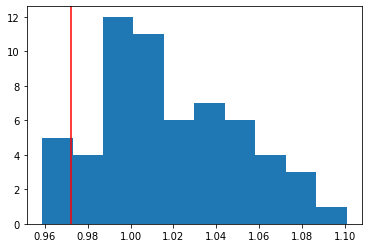

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0154226539502678


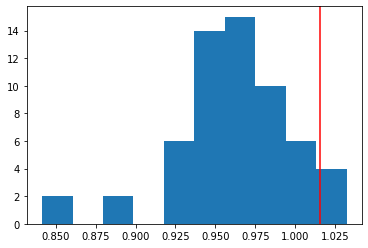

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0154226539502678, 0.9720266298930161)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0123083472004724, 0.9845593740180999)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2459,88.709999,88.709999,89.019997,86.260002,92.349998,86.691002,1.041033,0.977240,0
2460,89.970001,89.970001,92.349998,86.691002,87.500000,75.720001,0.972546,0.841614,1
2461,77.430000,77.430000,87.500000,75.720001,75.150002,69.500000,0.970554,0.897585,0
2462,72.489998,72.489998,75.150002,69.500000,72.290001,67.769997,0.997241,0.934888,0
2463,70.000000,70.000000,72.290001,67.769997,69.699997,66.529999,0.995714,0.950429,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0019843167666442, 0.9661646249772243, 1.016167527299761, 0.9767128038072582)

In [27]:
get_hilo_mults(aapl)

(1.0026166013346027, 0.9842778038776205, 1.01226414179611, 0.9903218072483695)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.002617,0.984278,1.012264,0.990322
1,ABMD,1.018908,0.995708,0.999757,0.990660
2,ABNB,1.008966,0.983174,1.009367,0.986652
3,ACN,1.000977,0.989543,1.007297,0.992261
4,ADBE,1.001486,0.984804,1.008842,0.981623


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,138.380005,AAPL
ABMD,373.98999,ABMD
ABNB,96.089996,ABNB
ACN,261.160004,ACN
ADBE,285.75,ADBE
...,...,...
ZM,77.459999,ZM
ZYXI,12.77,ZYXI
^GSPC,3770.550049,^GSPC
^IXIC,10475.254883,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.002617,0.984278,1.012264,0.990322,138.380005
1,ABMD,1.018908,0.995708,0.999757,0.990660,373.98999
2,ABNB,1.008966,0.983174,1.009367,0.986652,96.089996
3,ACN,1.000977,0.989543,1.007297,0.992261,261.160004
4,ADBE,1.001486,0.984804,1.008842,0.981623,285.75


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv